# Custom DBSCAN  with LSH

In [6]:
from lshash import LSHash
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics

# Create 750 data points 2D (from DBSCAN example)
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)
X = X.astype(np.float64)

# Create LSH structure with 300 buckets and 2 dimensions
conf = {'host':'localhost', 'port':6379, 'db':0}
lsh = LSHash(20, 2, num_hashtables=4, storage_config={"redis":conf}, matrices_filename="/Users/lsxliron/Desktop/SparseLSH/test.npz", overwrite=True)

# Index points
for i in xrange(0,len(X)):
    lsh.index(X[i], extra_data="{}".format(i))
print "Done indexing"
%time db = DBSCAN(eps=0.3, min_samples=10, algorithm="LSH", lshModel=lsh, lshR=0.1).fit(X)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, db.labels_))
print "Done clustering"
# db = DBSCAN(eps=0.3, min_samples=10).fit(X)

ConnectionError: Error 61 connecting to localhost:6379. Connection refused.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt


core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
fig = plt.figure(figsize=(15, 15), dpi=100)


# # Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
print unique_labels
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

# plt.title('Estimated number of clusters: %d' % n_clusters_)
# plt.xlim([-15,15])
# plt.ylim([-15,15])
plt.show()

NameError: name 'np' is not defined

# Original Example from SciPy

CPU times: user 6.03 ms, sys: 437 µs, total: 6.47 ms
Wall time: 7.21 ms
Estimated number of clusters: 3
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.883
Silhouette Coefficient: 0.626


/Users/lsxliron/.virtualenvs/bigdata/lib/python2.7/site-packages/matplotlib/lines.py:1106: UnicodeWarning: Unicode unequal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if self._markerfacecolor != fc:


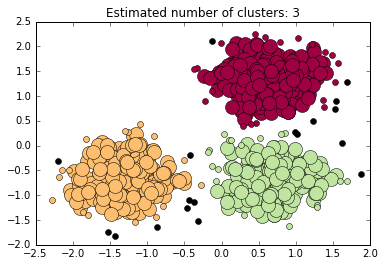

array([  0,   1,   2,   3,   4,   6,   7,   8,   9,  10,  11,  12,  13,
        15,  17,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  33,  34,  35,  36,  37,  38,  40,  41,  42,  43,  45,
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  77,  78,  79,  80,  81,  83,  84,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 106, 107, 109, 111, 112, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       147, 148, 150, 151, 152, 153, 155, 157, 159, 160, 162, 163, 164,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 197, 198, 199, 200, 201, 203, 204, 205, 20

In [2]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


##############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

##############################################################################
# Compute DBSCAN
%time db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

##############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# Dimensionality Reduction using TSNE for Jan. 2005 (Unclustered)

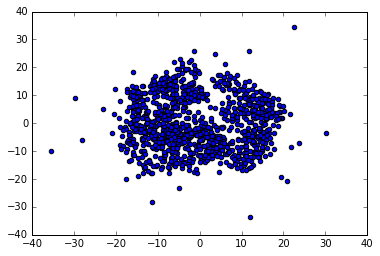

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
# X = np.load('/Users/lsxliron/Desktop/Fortran_INP-FLUX/Jan2005.npy')[0:1000]
model = TSNE(n_components=3, random_state=0)
z = model.fit_transform(X) 

xx = list()
yy = list()
zz = list()
for item in z:
    xx.append(item[0])
    yy.append(item[1])
plt.scatter(xx, yy)

# Dimensionality Reduction Using PCA (Unclustered)

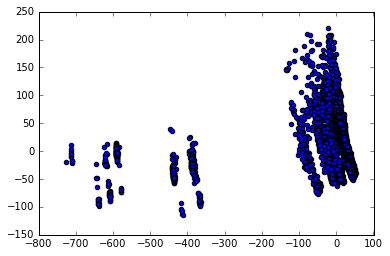

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# X = np.load('/Users/lsxliron/Desktop/Fortran_INP-FLUX/Jan2005.npy')
pca = PCA(n_components=2)
pca.fit(X)
model = PCA(n_components=2)
z = pca.transform(X) 

xx = list()
yy = list()
for item in z:
    xx.append(item[0])
    yy.append(item[1])
plt.scatter(xx, yy)

# DBSCAN for Jan. 2005

In [19]:
## from lshash import LSHash
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import numpy as np
from lshash import LSHash
X = np.load('/Users/lsxliron/Desktop/Fortran_INP-FLUX/Jan2005.npy')
# model = TSNE(n_components=2, random_state=0)
# X = model.fit_transform(X) 
# pca = PCA(n_components=2)
# pca.fit(X)
# X = pca.transform(X) 




# Create LSH structure with 300 buckets and 2 dimensions
conf = {'host':'localhost', 'port':6379, 'db':0}
lsh = LSHash(100, 41, num_hashtables=4, storage_config={"redis":conf}, matrices_filename="/Users/lsxliron/Desktop/SparseLSH/test.npz", overwrite=True)

# Index points
for i in xrange(0,len(X)):
    lsh.index(X[i], extra_data="{}".format(i))
print "Done indexing"
db = DBSCAN(eps=25, min_samples=6, algorithm="LSH", lshModel=lsh, lshR=1135).fit(X)
print "Done clustering"
print set(db.labels_)

KeyboardInterrupt: 

# Jan. 2005 TSNE after DBSCAN (1000 pts)

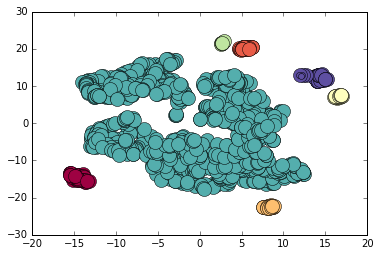

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# pca = PCA(n_components=2)
# pca.fit(X)
# z = pca.transform(X) 


# X = np.load('/Users/lsxliron/Desktop/Fortran_INP-FLUX/Jan2005.npy')[0:1000]
model = TSNE(n_components=2, random_state=0)
z = model.fit_transform(X) 
labels = db.labels_
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
# labels = db.labels_



# # Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = z[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = z[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

# plt.title('Estimated number of clusters: %d' % n_clusters_)
# plt.xlim([-15,15])
# plt.ylim([-15,15])
plt.show()

# Jan. 2005 PCA after DBSCAN (1000 pts)

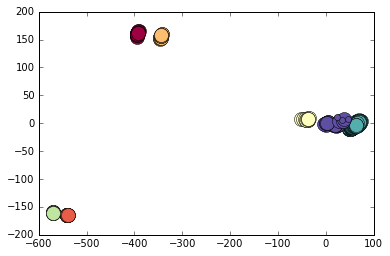

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=2)
pca.fit(X)
z = pca.transform(X) 


# X = np.load('/Users/lsxliron/Desktop/Fortran_INP-FLUX/Jan2005.npy')[0:1000]
# model = TSNE(n_components=2, random_state=0)
# z = model.fit_transform(X) 
labels = db.labels_
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
# labels = db.labels_



# # Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = z[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = z[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

# plt.title('Estimated number of clusters: %d' % n_clusters_)
# plt.xlim([-15,15])
# plt.ylim([-15,15])
plt.show()

# Custrom DBSCAN with LSHForest

X
CPU times: user 1.02 ms, sys: 187 µs, total: 1.2 ms
Wall time: 1.08 ms
set([-1])


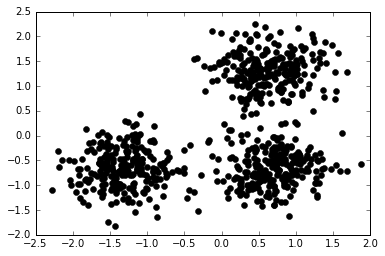

In [33]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LSHForest
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import pickle


# Create 750 data points 2D (from DBSCAN example)
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)


##################################################################################################################
##################################################################################################################
##################################################################################################################

lshf = LSHForest(n_estimators=15, random_state=41)
lshf.fit(X)

# Process NN
tempnns = list()
# t= list()
for i in range(0, len(X)):
    tempI = lshf.kneighbors(X[i].reshape(1,-1), n_neighbors=3, return_distance=False)
#     tempI = lshf.radius_neighbors(X[i].reshape(1,-1), radius=0.003, return_distance=False)
    if i == len(X)-1:
        print "X"
        tempnns.append(np.array(tempI[0].tolist()[0:-1],dtype=np.int64))
    else:
        tempnns.append(np.array(tempI[0].tolist(),dtype=np.int64))


        
neighborhoods = np.array(tempnns, dtype=object)   
n_neighbors = [len(n) for n in neighborhoods]

model = {'neighborhoods':neighborhoods,'n_neighbors':n_neighbors}

%time db = DBSCAN(eps=0.01, algorithm="LSHF", lshModel=model, leaf_size=3).fit(X)

    
##################################################################################################################
##################################################################################################################
##################################################################################################################


core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_



# # Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
print unique_labels
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

# plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# Jan2005 LSHForest with TSNE 10K

X
CPU times: user 342 ms, sys: 249 ms, total: 591 ms
Wall time: 640 ms
set([0, 1, 2, 3, 4, 5, 6, 7, 8, -1])


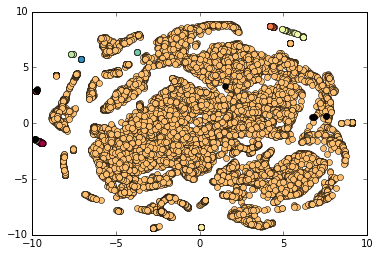

In [86]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LSHForest
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import bcolz as bc

# Create 750 data points 2D (from DBSCAN example)
# centers = [[1, 1], [-1, -1], [1, -1]]
# X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
#                             random_state=0)

# X = StandardScaler().fit_transform(X)

X = np.load('/Users/lsxliron/Desktop/Fortran_INP-FLUX/Jan2005.npy')[0:10000]
##################################################################################################################
##################################################################################################################
##################################################################################################################

lshf = LSHForest(n_estimators=4, random_state=41, n_neighbors=20)
lshf.fit(X)

# Process NN
tempnns = list()
# t= list()
for i in range(0, len(X)):
#     tempI = lshf.kneighbors(X[i].reshape(1,-1), return_distance=False)
    tempI = lshf.radius_neighbors(X[i].reshape(1,-1), radius=0.0005, return_distance=False)
    if i == len(X)-1:
        print "X"
        tempnns.append(np.array(tempI[0].tolist()[0:-1],dtype=np.int64))
    else:
        tempnns.append(np.array(tempI[0].tolist(),dtype=np.int64))


        
neighborhoods = np.array(tempnns, dtype=object)   
n_neighbors = [len(n) for n in neighborhoods]

model = {'neighborhoods':neighborhoods,'n_neighbors':n_neighbors}

%time db = DBSCAN(eps=25, min_samples=6, algorithm="LSHF", lshModel=model).fit(X)

    
##################################################################################################################
##################################################################################################################
##################################################################################################################


core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

model = TSNE(n_components=2, random_state=0)
z = model.fit_transform(X) 

# # Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
print unique_labels
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = z[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

    xy = z[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

# plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# Jan2005 LSHForest with PCA 10K

set([0, 1, 2, 3, 4, 5, 6, 7, 8, -1])


/Users/lsxliron/.virtualenvs/bigdata/lib/python2.7/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 2407540 but corresponding boolean dimension is 10000
/Users/lsxliron/.virtualenvs/bigdata/lib/python2.7/site-packages/ipykernel/__main__.py:24: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 2407540 but corresponding boolean dimension is 10000


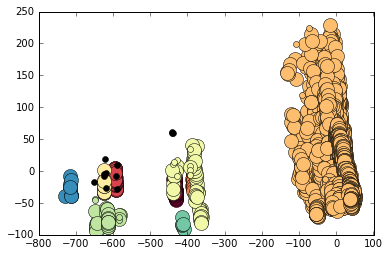

In [90]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
z = pca.transform(X) 



# # Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
print unique_labels
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = z[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = z[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

# plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# 2005 Full

In [34]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LSHForest
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import bcolz as bc

# Create 750 data points 2D (from DBSCAN example)
# centers = [[1, 1], [-1, -1], [1, -1]]
# X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
#                             random_state=0)

# X = StandardScaler().fit_transform(X)

print "Loading data"
X = np.load('/Users/lsxliron/Desktop/Fortran_INP-FLUX/Jan2005.npy')
print "Data loaded ({} points)".format(len(X))
##################################################################################################################
##################################################################################################################
##################################################################################################################

print "Building LHSF model"
lshf = LSHForest(n_estimators=20, random_state=41, n_neighbors=20)
print "Done\nFitting data"
lshf.fit(X)
print "Done\nPerformnig Queris"

# Process NN
length = len(X)
tempnns = list()
# t= list()
for i in range(0, length):
#     tempI = lshf.kneighbors(X[i].reshape(1,-1), return_distance=False)
    print "{}/{}".format(i,length)
    tempI = lshf.radius_neighbors(X[i].reshape(1,-1), radius=0.0005, return_distance=False)
    if i == len(X)-1:
        tempnns.append(np.array(tempI[0].tolist()[0:-1],dtype=np.int64))
    else:
        tempnns.append(np.array(tempI[0].tolist(),dtype=np.int64))


        
neighborhoods = np.array(tempnns, dtype=object)   
n_neighbors = [len(n) for n in neighborhoods]

model = {'neighborhoods':neighborhoods,'n_neighbors':n_neighbors}

print "Done\nClustering"
%time db = DBSCAN(eps=25, min_samples=6, algorithm="LSHF", lshModel=model).fit(X)

    
##################################################################################################################
##################################################################################################################
##################################################################################################################


core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
fig = plt.figure(figsize=(4, 5), dpi=100)

print "Done\nReducing dimensions"
model = TSNE(n_components=2, random_state=0)
z = model.fit_transform(X) 
print "Done\nPlotting..."
# # Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
print unique_labels
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = z[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

    xy = z[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

# plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Loading data
Data loaded (204476 points)
Building LHSF model
Done
Fitting data


KeyboardInterrupt: 

# Thead hepler

In [39]:
def test(eng, d,i):
#         print i
        q.put(eng.neighbours(d))

# Expeiments with NearPy
## Generate random 750 pts

In [61]:
# Create 750 pts
from lshash import LSHash
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics

# Create 750 data points 2D (from DBSCAN example)
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)
X = X.astype(np.float64)

# Build Engine

In [121]:
import numpy as np
from nearpy import Engine
from nearpy.filters import NearestFilter, DistanceThresholdFilter
from nearpy.distances import EuclideanDistance, ManhattanDistance
from nearpy.hashes import RandomBinaryProjections
import Queue
import thread
# X = np.load('/Users/lsxliron/Desktop/Fortran_INP-FLUX/Jan2005.npy')[0:1000]


print "Done loading"
q = Queue.Queue()
dimension = X.shape[1]
rbp = RandomBinaryProjections('rbp', 2)

# engine = Engine(dimension, lshashes=[rbp], distance=EuclideanDistance(), vector_filters=[NearestFilter(5)])
engine = Engine(dimension, lshashes=[rbp], distance=ManhattanDistance(), vector_filters=[NearestFilter(20)])
for i in xrange(0,len(X)):
    engine.store_vector(X[i], i)
print "Done indexing"

tempnns = list()
for i in range(0,len(X)):
    t = thread.start_new_thread(test, (engine, X[i],i))
    r = np.array(q.get())
    tempnns.append(r[:,1].astype(np.int64))
# q.join()
tempnns[len(tempnns)-1] = tempnns[len(tempnns)-1][:-1]
neighborhoods = np.array(tempnns, dtype=object)


model = {'neighborhoods':neighborhoods}

while not q.empty():
    print "wait"

print "Done\nClustering"
%time db = DBSCAN(eps=0.3, min_samples=14, algorithm="LSHF", lshModel=model).fit(X)
print "Finished"

#     print "{}. {}".format(i+1, len(r))

Done loading
Done indexing
Done
Clustering
CPU times: user 2.26 ms, sys: 266 µs, total: 2.53 ms
Wall time: 2.35 ms
Finished


## Plot 750 pts

set([0, 1, 2, -1])


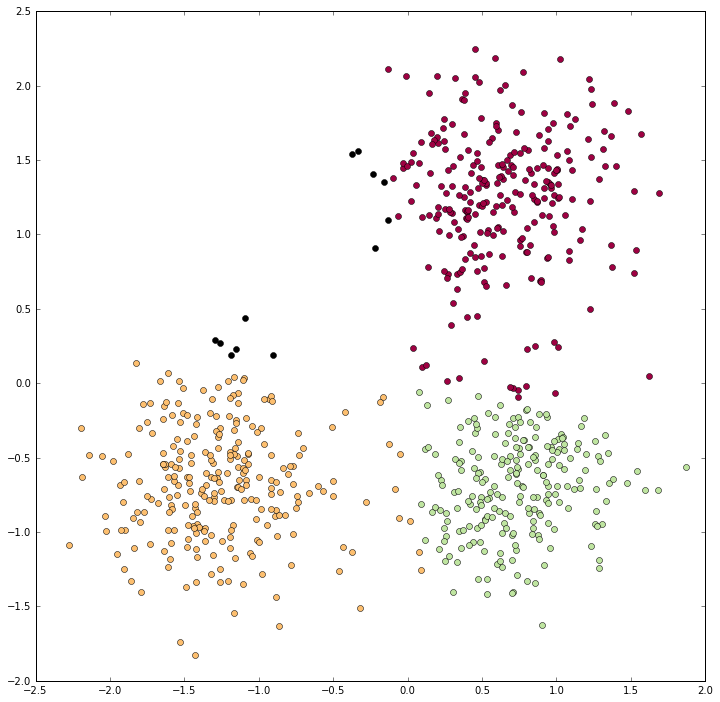

In [122]:
%matplotlib inline
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
fig = plt.figure(figsize=(12, 12), dpi=100)

# print "Done\nReducing dimensions"
# model = TSNE(n_components=2, random_state=0)
# z = model.fit_transform(X)
z=X
# print "Done\nPlotting..."
# # Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
print unique_labels
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = z[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

    xy = z[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

# plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# Jan 2005

In [229]:
import numpy as np
from nearpy import Engine
from nearpy.filters import NearestFilter, DistanceThresholdFilter
from nearpy.distances import EuclideanDistance, ManhattanDistance
from nearpy.hashes import RandomBinaryProjections
import Queue
import thread
import time
X = np.load('/Users/lsxliron/Desktop/Fortran_INP-FLUX/Jan2005.npy')


print "Done loading"
q = Queue.Queue()
dimension = X.shape[1]
rbp = RandomBinaryProjections('rbp', 10)

# engine = Engine(dimension, lshashes=[rbp], distance=EuclideanDistance(), vector_filters=[NearestFilter(5)])
engine = Engine(dimension, lshashes=[rbp], distance=ManhattanDistance(), vector_filters=[NearestFilter(15)])
for i in xrange(0,len(X)):
    engine.store_vector(X[i], i)
print "Done indexing"
t1 = int(time.time())
tempnns = list()
for i in range(0,len(X)):
    t = thread.start_new_thread(test, (engine, X[i],i))
    r = np.array(q.get())
    tempnns.append(r[:,1].astype(np.int64))
# q.join()
tempnns[len(tempnns)-1] = tempnns[len(tempnns)-1][:-1]
neighborhoods = np.array(tempnns, dtype=object)
t2 = int(time.time())
print "Time required: {} seconds".format(t2-t1)

model = {'neighborhoods':neighborhoods}

while not q.empty():
    print "wait"

print "Done\nClustering"
%time db = DBSCAN(eps=0.3, min_samples=10, algorithm="LSHF", lshModel=model).fit(X)
print "Finished"

#     print "{}. {}".format(i+1, len(r))

Done loading
Done indexing
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47


KeyboardInterrupt: 

# Plot Jan 2005

# Multiprocess test

In [1]:
# def poolTest(eng, d, cc):
def poolTest(args):
#         print d[0]
#     print cc
#     cc+=1
#     return n.array(c[0].neighbours)
    return np.array(args[0].neighbours(args[1]))[:,1].astype(np.int64)
#     return np.array(engine.neighbours(d))[:,1].astype(np.int64)
#     return np.array(engine.neighbours(X[0]))[:,1].astype(np.int64)

In [2]:
import numpy as np
from nearpy import Engine
from nearpy.filters import NearestFilter, DistanceThresholdFilter
from nearpy.distances import EuclideanDistance, ManhattanDistance
from nearpy.hashes import RandomBinaryProjections
from sklearn.cluster import DBSCAN
import Queue
import thread
import time
from multiprocessing import Pool
import pdb
X = np.load('/Users/lsxliron/Desktop/Fortran_INP-FLUX/Jan2005.npy')[0:100]

cc=0
print "Done loading"

# print "Sleeping 10 seconds"
# time.sleep(10)
# print "Woke up"

pool = Pool()
dimension = X.shape[1]
rbp = RandomBinaryProjections('rbp', 13)

# engine = Engine(dimension, lshashes=[rbp], distance=EuclideanDistance(), vector_filters=[NearestFilter(5)])
engine = Engine(dimension, lshashes=[rbp], distance=ManhattanDistance(), vector_filters=[NearestFilter(30)])
engine.clean_all_buckets()
doneIndexing=False
for i in xrange(0,len(X)):
    engine.store_vector(X[i], i)
        
print "Done indexing"
t1 = int(time.time())
tempnns = list()

# results = [pool.apply_async(poolTest, (engine, pt, cc) ) for pt in X]
tt = [(engine, pt) for pt in X]
tempnns = pool.map(poolTest, (x for x in tt) )
pool.close()
pool.join()
# print results
# tempnns = [r.get() for r in results]
# tempnns = [r for r in results]
# print tempnns
# print res

# for i in range(0,1):
#     t = pool.apply_async(poolTest, [engine, X[i], i])
    # t = thread.start_new_thread(test, (engine, X[i],i))
#     r = np.array(t.get(timeout=10))
#     print "R\n{}".format(r)
#     tempnns.append(r[:,1].astype(np.int64))
# q.join()

tempnns[len(tempnns)-1] = tempnns[len(tempnns)-1][:-1]
neighborhoods = np.array(tempnns, dtype=object)
t2 = int(time.time())
print "Time required: {} seconds".format(t2-t1)

model = {'neighborhoods':neighborhoods}

# while not q.empty():
#     print "wait"

print "Done\nClustering"
%time db = DBSCAN(eps=1, min_samples=29, algorithm="LSHF", lshModel=model).fit(X)
print "Finished with {} clusters".format(len(set(db.labels_)))

#     print "{}. {}".format(i+1, len(r))

Done loading
Done indexing
Time required: 0 seconds
Done
Clustering
CPU times: user 1.11 ms, sys: 863 µs, total: 1.97 ms
Wall time: 2 ms
Finished with 3 clusters


In [ ]:
%matplotlib inline
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
fig = plt.figure(figsize=(12, 12), dpi=100)

print "Done\nReducing dimensions"
model = TSNE(n_components=2, random_state=0)
z = model.fit_transform(X)
# z=X
# print "Done\nPlotting..."
# # Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
print unique_labels
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = z[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

    xy = z[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

# plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [28]:
def worker(a):
    return a[0]+a[1]

In [29]:
import multiprocessing
import numpy as np
import random
tasks=list()
length = 10
for i in range(0,length):
    tasks.append("Task {}".format(i+1))
aa = [random.randint(1,100) for x in xrange(0,10)]
bb = [random.randint(1,100) for x in xrange(0,10)]
# print aa
# print bb
cc=zip(aa,bb)
print cc

pool = multiprocessing.Pool()
# results = [pool.apply_async(poolTest, (engine, pt, cc) ) for pt in X]
# tempnns = [r.get() for r in results]

results = pool.map(worker, (x for x in cc))
pool.close()
pool.join()
print results
# qqqq = [r.get() for r in results]
# print qqqq

[(29, 89), (59, 56), (47, 53), (98, 81), (46, 85), (95, 7), (66, 53), (61, 82), (100, 61), (89, 18)]
[118, 115, 100, 179, 131, 102, 119, 143, 161, 107]


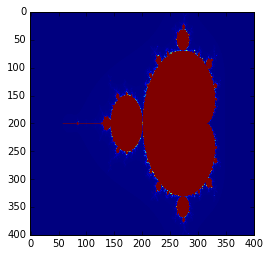

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from functools import partial
 
def mandelbrotCalcRow(yPos, h, w, max_iteration = 1000):
    y0 = yPos * (2/float(h)) - 1 #rescale to -1 to 1
    row = []
    for xPos in range(w):
        x0 = xPos * (3.5/float(w)) - 2.5 #rescale to -2.5 to 1
        iteration, z = 0, 0 + 0j
        c = complex(x0, y0)
        while abs(z) < 2 and iteration < max_iteration:
            z = z**2 + c
            iteration += 1
        row.append(iteration)
 
    return row
 
def mandelbrotCalcSet(h, w, max_iteration = 1000):
    partialCalcRow = partial(mandelbrotCalcRow, h=h, w=w, max_iteration = max_iteration)
    mandelImg = map(partialCalcRow, xrange(h))
    return mandelImg
 
mandelImg = mandelbrotCalcSet(400, 400, 1000)
plt.imshow(mandelImg)
plt.show()

In [5]:
import pickle
pickle.dump(engine, open("test.pickle",'w'))

In [2]:
import pickle
import numpy as np
engine = pickle.load(open('test.pickle','r'))

In [6]:
X = np.load('/Users/lsxliron/Desktop/Fortran_INP-FLUX/Jan2005.npy')[0:100]

In [3]:
engine.neighbours(X[0])

NameError: name 'X' is not defined

In [3]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics

neighborhoods = np.load('njan2005.npy')[0:1000]
X = np.load('/Users/lsxliron/Desktop/Fortran_INP-FLUX/Jan2005.npy')[0:1000]
model = {'neighborhoods':neighborhoods}

print "Done\nClustering"
%time db = DBSCAN(eps=133, min_samples=21, algorithm="LSHF", lshModel=model).fit(X)
print "Finished"
print "unique labels: {}".format(set(db.labels_))

Done
Clustering
CPU times: user 2.51 ms, sys: 212 µs, total: 2.72 ms
Wall time: 2.52 ms
Finished
unique labels: set([-1])


Done
Reducing dimensions
Done
Plotting...
set([0, 1, 2, 3, -1])


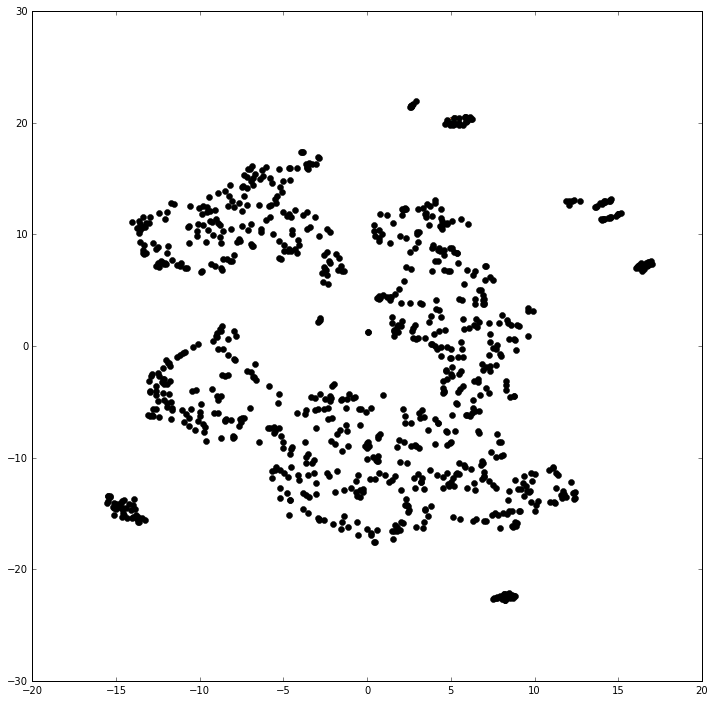

In [9]:
%matplotlib inline
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
fig = plt.figure(figsize=(12, 12), dpi=100)
unique_lables = set(labels)
print "Done\nReducing dimensions"
model = TSNE(n_components=2, random_state=0)
z = model.fit_transform(X)
# z=X
print "Done\nPlotting..."
# # Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
print unique_labels
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = z[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

    xy = z[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

# plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [15]:
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  2,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  2,  1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1